#Importing required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

#Load data set

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#Inspect the data shape and information about null and data types

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#Check if there is any null values in the given dataframe

In [7]:

df.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#Replacing the data column name for better understanding

In [9]:
df.rename(columns={'dteday':'Date','yr':'Year','mnth':'Month','hum':'Humidity','cnt':'Count'}, inplace=True)

In [10]:



df.head()

,instant,Date,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#Dropping the unwanted columns


In [11]:

# Droping "instant" column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

In [12]:

# Dropping 'Date' as we have already have month and week coloumn
df.drop(['Date'], axis = 1, inplace = True)

Dropping coloumn 'casual' and 'register' because there is sum of count 

In [13]:
df.drop(['casual'], axis = 1, inplace = True)

In [14]:
df.drop(['registered'], axis = 1, inplace = True)

#Check data head again

In [15]:

df.head(20)

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


##One hot encoding

# Chnage the values of season column to categorical type


In [16]:

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)


# Chnage the values of Month column to categorical type


In [17]:

df.Month = df.Month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Chnage the values of the weekday column to categorical type


In [18]:



df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Chnage the values of the weather column to categorical type




In [19]:


df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)


In [20]:
df.head(20)

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,moderate,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,moderate,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,good,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,good,6.184153,7.54440,48.2917,14.958889,1321


#



Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

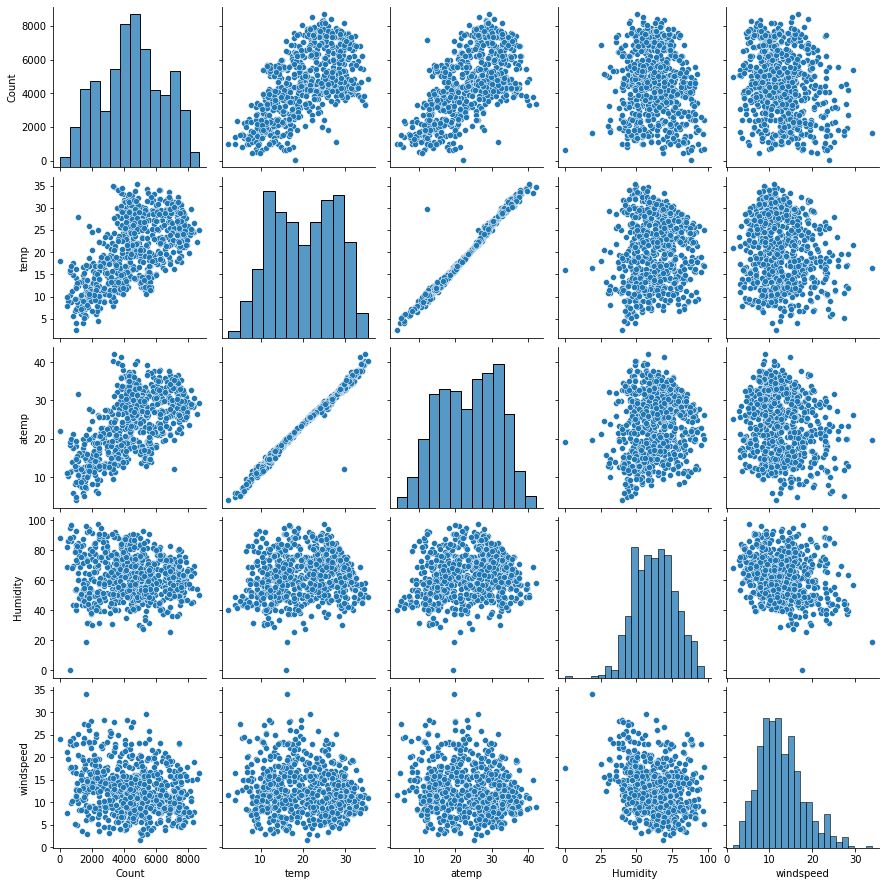

In [21]:

plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['Count', 'temp', 'atemp', 'Humidity','windspeed'])
plt.show()



---


 

1.  Looks like the temp and atemp has the highest corelation with the target variable Count

2. temp and atemp are highly co-related with each other


---



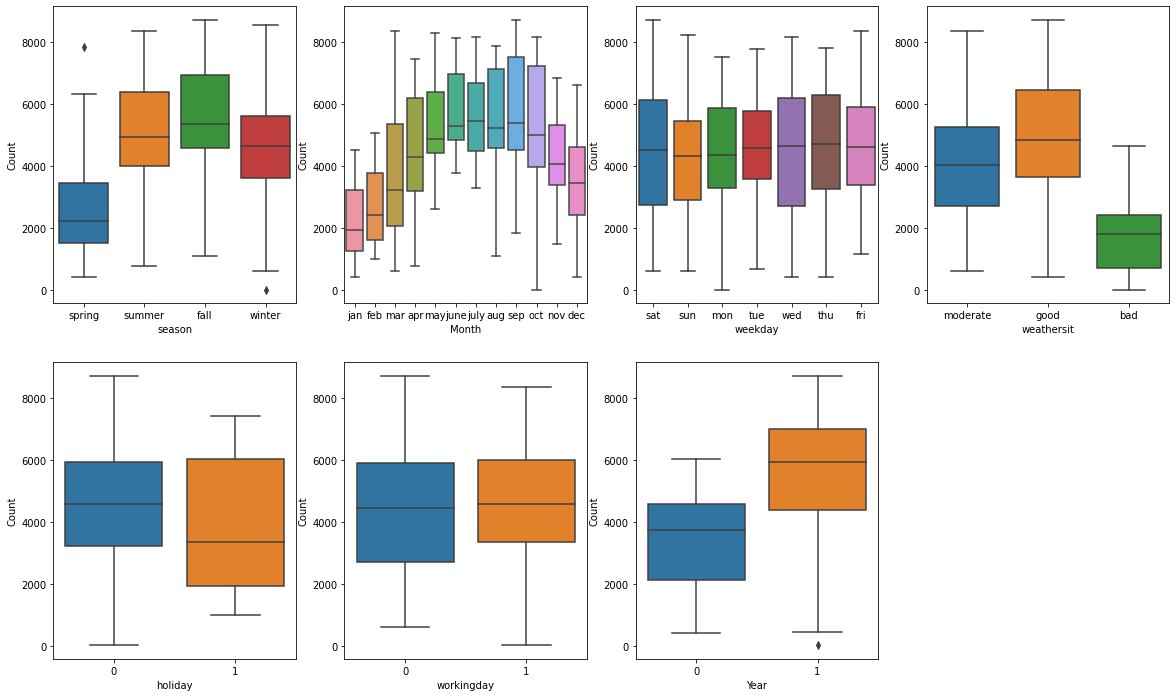

In [22]:

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'Count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'Month', y = 'Count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'Count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'Count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'Count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'Count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'Year', y = 'Count', data = df)
plt.show()




Inference:
Here many insights can be drawn from the plots

1. Fall has highest demand for rental bikes
2. demand for next year has incresed
3. Demand is continuously growing each month till June.
4. After September, demand is decreasing
5. When there is a holiday, demand has decreased.
6. Weekday is not giving clear picture abount demand.
7. September month has highest demand.

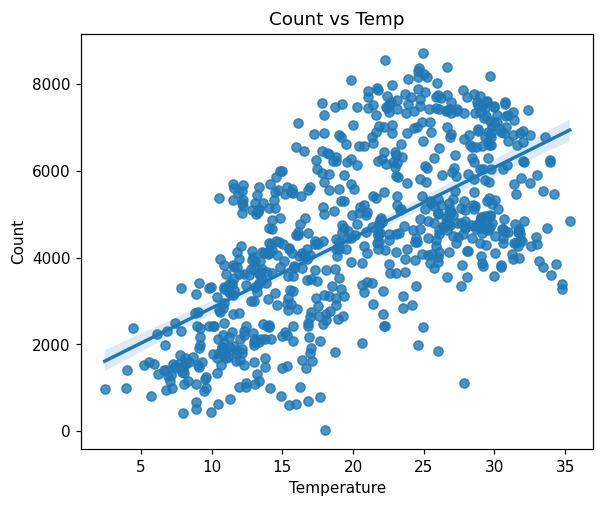

In [23]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Temp")
sns.regplot(data=df,y="Count",x="temp")
plt.xlabel("Temperature")
plt.show()



Inference:
Demand for bikes is positively correlated to temp.

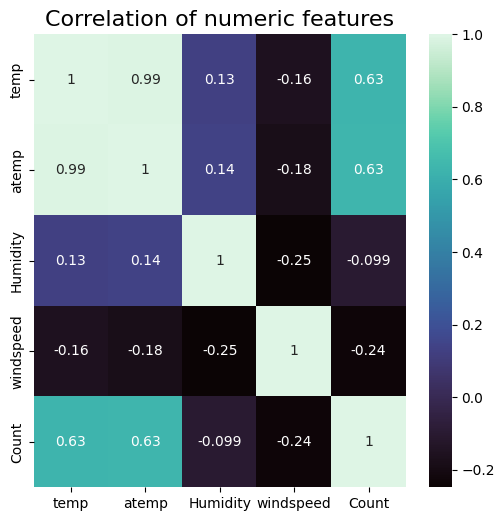

In [24]:
num_features = ["temp","atemp","Humidity","windspeed","Count"]
plt.figure(figsize=(6,6),dpi=100)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()


Temp and atemp has high correation

Temp and Atemp also have high correlation with cnt variable.

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [25]:
df.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#Data Preparation for Linear Regression

In [26]:
# Dummy variable 
df = pd.get_dummies(data=df,columns=["season","Month","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [27]:
df.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'season_spring', 'season_summer', 'season_winter',
       'Month_aug', 'Month_dec', 'Month_feb', 'Month_jan', 'Month_july',
       'Month_june', 'Month_mar', 'Month_may', 'Month_nov', 'Month_oct',
       'Month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [28]:
df.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,...,Month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
df.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'season_spring', 'season_summer', 'season_winter',
       'Month_aug', 'Month_dec', 'Month_feb', 'Month_jan', 'Month_july',
       'Month_june', 'Month_mar', 'Month_may', 'Month_nov', 'Month_oct',
       'Month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [30]:
df.shape

(730, 31)

#Split Data into training and test

In [31]:
#y to contain only target variable
y=df.pop('Count')

In [32]:
#X is all remainign variable also our independent variables
X=df

In [33]:
#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [34]:
X.head()


,Year,holiday,workingday,temp,atemp,Humidity,windspeed,season_spring,season_summer,season_winter,...,Month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [35]:
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [36]:
# Let us scale continuous variables
num_vars = ['temp','atemp','Humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [37]:
#Inspect stats fro Training set after scaling
X_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,season_spring,season_summer,season_winter,...,Month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.499022,0.027397,0.692759,0.555633,0.522053,0.648898,0.343667,0.238748,0.256360,0.236791,...,0.091977,0.152642,0.136986,0.142857,0.138943,0.136986,0.154599,0.035225,0.630137,0.334638
std,0.500489,0.163398,0.461802,0.232202,0.213782,0.146794,0.162310,0.426736,0.437051,0.425529,...,0.289276,0.359994,0.344170,0.350270,0.346226,0.344170,0.361876,0.184529,0.483240,0.472326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352195,0.340079,0.544225,0.227561,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.568130,0.543410,0.650923,0.314103,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755555,0.697971,0.753113,0.436348,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,season_spring,season_summer,season_winter,...,Month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
466,1,0,1,0.428749,0.404993,0.480464,0.552573,0,1,0,...,0,0,0,0,1,0,0,0,1,0
96,0,0,1,0.479433,0.465495,0.621297,0.288453,0,1,0,...,0,0,0,0,1,0,0,0,1,0
432,1,0,1,0.445643,0.417436,0.419493,0.808970,1,0,0,...,0,0,0,0,0,0,0,0,0,1
687,1,0,1,0.407630,0.389264,0.642335,0.438441,0,0,1,...,0,1,0,0,0,0,0,0,0,1
507,1,0,1,0.712791,0.663593,0.798196,0.164117,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#Build a Model using RFE and Automated approach
#Use RFE to eliminate some columns

In [39]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [41]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('Month_aug', False, 16),
 ('Month_dec', True, 1),
 ('Month_feb', False, 8),
 ('Month_jan', False, 7),
 ('Month_july', True, 1),
 ('Month_june', False, 6),
 ('Month_mar', False, 5),
 ('Month_may', False, 4),
 ('Month_nov', True, 1),
 ('Month_oct', False, 13),
 ('Month_sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

 #Manual elimination
Function to build a model using statsmodel api

Build model function

In [42]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

Build fuction to find VIF

In [43]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [44]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['Year', 'holiday', 'temp', 'atemp', 'Humidity', 'windspeed',
       'season_spring', 'season_winter', 'Month_dec', 'Month_july',
       'Month_nov', 'Month_sep', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [45]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'Month_aug', 'Month_feb', 'Month_jan',
       'Month_june', 'Month_mar', 'Month_may', 'Month_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [46]:
# Taking 13 columns supported by RFE for regression
X_train_rfe = X_train[['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed', 'season_spring',
         'season_winter', 'Month_jan', 'Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']]

In [47]:
X_train_rfe.shape

(511, 13)

#Build Model







#Model 1 


---


 Start with all variables selected by RFE


---

In [48]:
cols=['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed', 'season_spring',
         'season_winter', 'Month_jan', 'Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.02e-188
Time:                        00:02:12   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8367.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2844.3678    

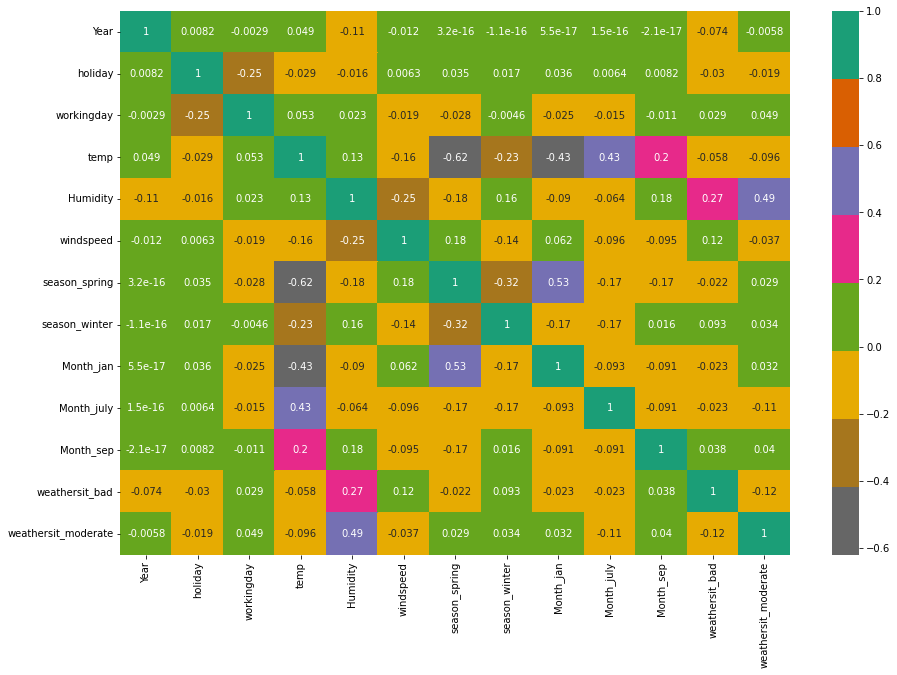

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(df[['Year','holiday', 'workingday', 'temp', 'Humidity', 'windspeed', 'season_spring',
         'season_winter', 'Month_jan', 'Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='Dark2_r', annot=True)
plt.show()

#Model 2


---


Dropping the variable Month_jan as it has negative coefficient and is insignificant as it p value is high as .501


---



In [50]:
cols=['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed', 'season_spring',
         'season_winter','Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.34e-189
Time:                        00:02:13   Log-Likelihood:                -4140.0
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     498   BIC:                             8361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2820.5272    

#Model 3



---


Dropping the value of working day because it p value is still higher

---



In [51]:
cols=['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'season_spring',
         'season_winter','Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.34e-190
Time:                        00:02:13   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     499   BIC:                             8355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2842.9551    

#Model 4

Humidity has higher VIF like 21.39 consider it has multicollinearity

In [52]:
cols=['Year', 'holiday', 'temp', 'windspeed', 'season_spring',
         'season_winter','Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.57e-187
Time:                        00:02:13   Log-Likelihood:                -4150.2
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     500   BIC:                             8369.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1968.9206    

#Inference
1. Here VIF seems to be almost accepted. p-value for all the features is almost 0.00 and R2 is 0.833 Let us select Model 4 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 

2. Difference between R-squared and Adjusted R-squared values for this model is very less,i.e. (0.003) which also means that there are no additional parameters need to removed from this model.

# Other Findings
1. We can cosider the above Model 4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
2. F-Statistics value of 249.9 (which is greater than 1)
3. p-value of 2.57e-187 i.e almost equals to zero, states that the overall model is significant

In [53]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [54]:
#Let us build the finalmodel using sklearn
cols=['Year', 'holiday', 'temp', 'windspeed', 'season_spring',
         'season_winter','Month_july', 'Month_sep',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_)

1968.9206242778855


In [55]:
# Checking the parameters and their coefficient values
print (lr.coef_)

[ 2013.85240892  -988.89014836  4139.51809253  -950.77606127
  -859.83206019   509.05823341  -523.87479606   557.24237981
 -2517.50939286  -735.84225684]


#Residucal Analysis

In [56]:
y_train_pred = lr.predict(X_train[cols])

In [57]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

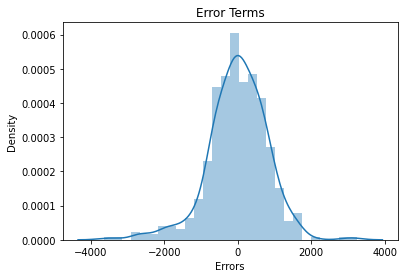

In [58]:
plot_res_dist(y_train, y_train_pred)



---

Errors are normally distribured here with mean 0. So everything seems to be fine

---




In [59]:
X_train[cols]

,Year,holiday,temp,windspeed,season_spring,season_winter,Month_july,Month_sep,weathersit_bad,weathersit_moderate
466,1,0,0.428749,0.552573,0,0,0,0,0,0
96,0,0,0.479433,0.288453,0,0,0,0,0,0
432,1,0,0.445643,0.808970,1,0,0,0,0,1
687,1,0,0.407630,0.438441,0,1,0,0,0,1
507,1,0,0.712791,0.164117,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
440,1,0,0.576578,0.182060,1,0,0,0,0,1
165,0,0,0.719127,0.299998,0,0,0,0,0,0
7,0,0,0.134148,0.503869,1,0,0,0,0,1
219,0,0,0.894409,0.350017,0,0,0,0,0,0


#Multi Colinearity

In [60]:
get_vif(cols)

              Features   VIF
2                 temp  5.16
3            windspeed  4.72
0                 Year  2.02
4        season_spring  1.65
9  weathersit_moderate  1.52
6           Month_july  1.39
5        season_winter  1.35
7            Month_sep  1.21
8       weathersit_bad  1.11
1              holiday  1.03


All vif values are near 5. so we can consider as no multi colinearity

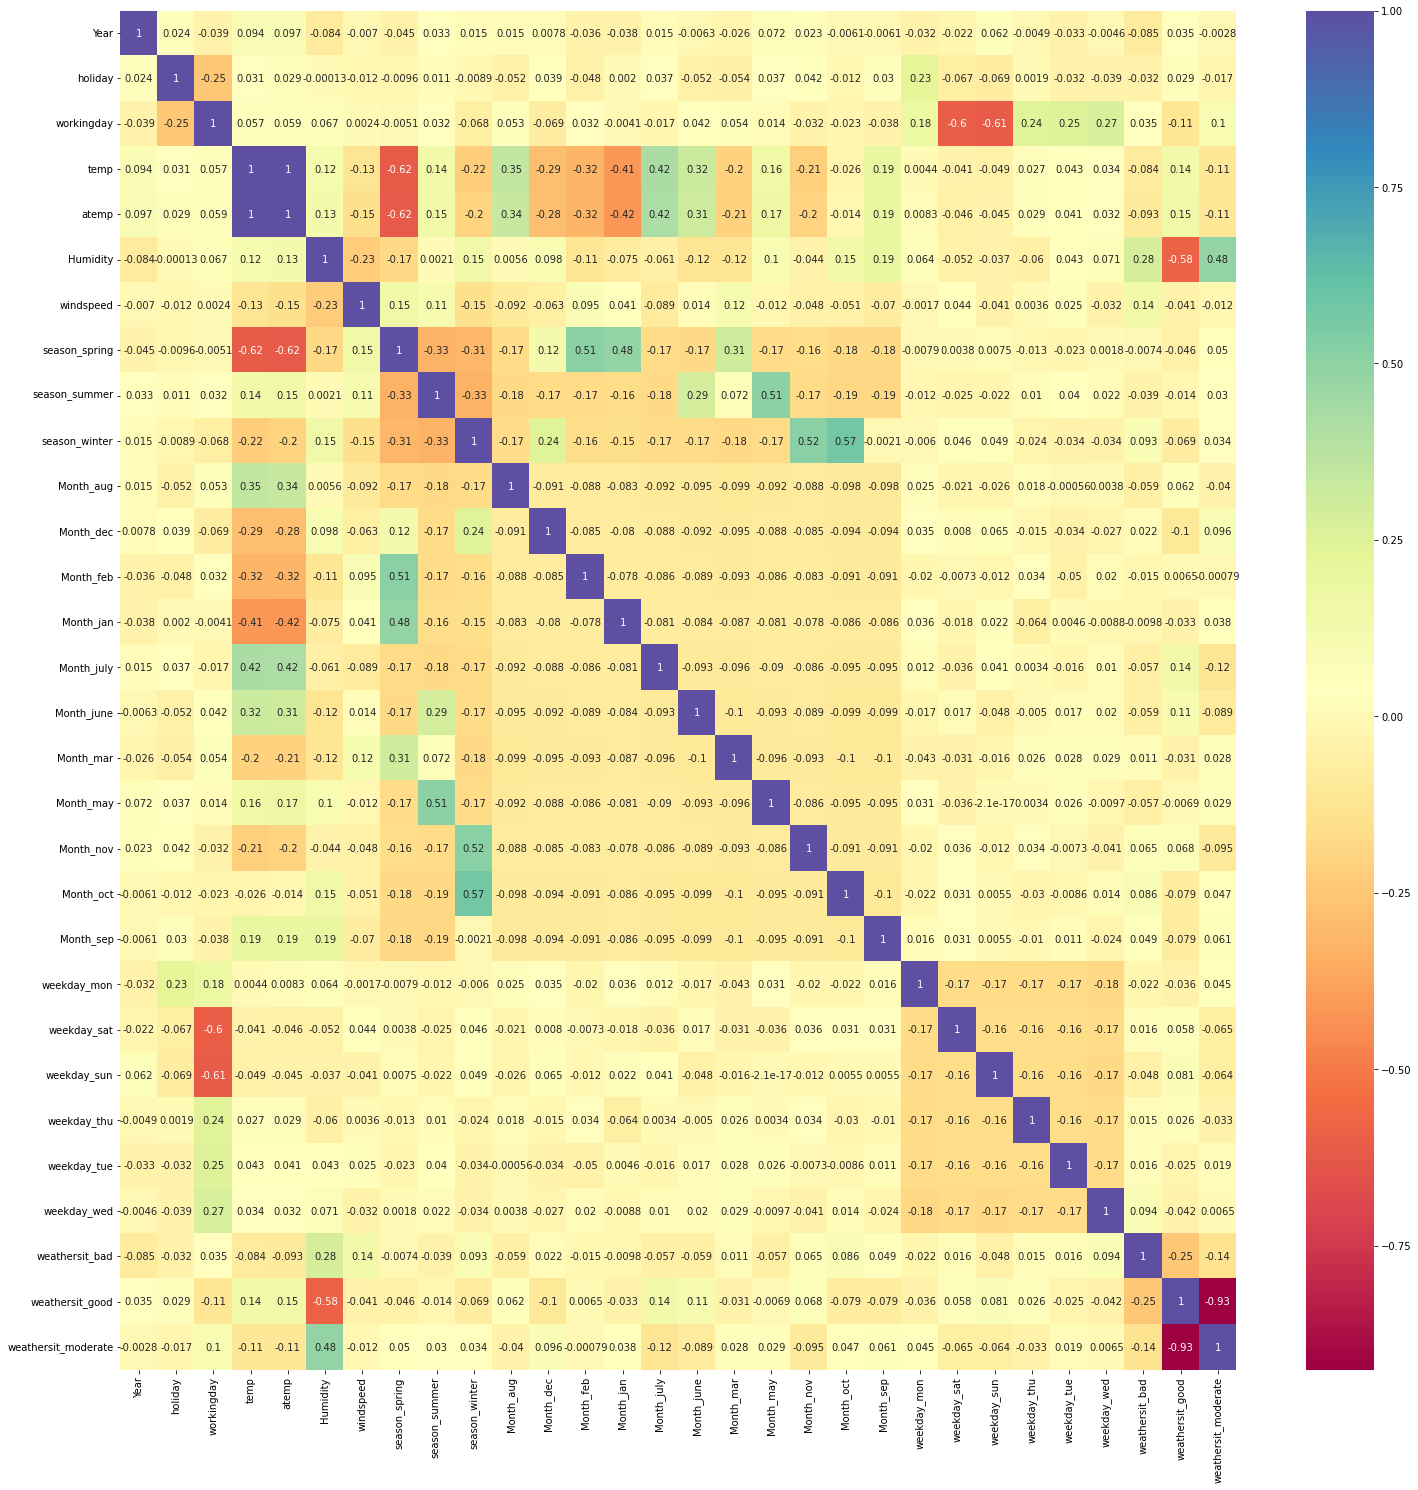

In [61]:
plt.figure(figsize=(25,25))
sns.heatmap(X_train.corr(),annot = True, cmap="Spectral")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#Linearity Check

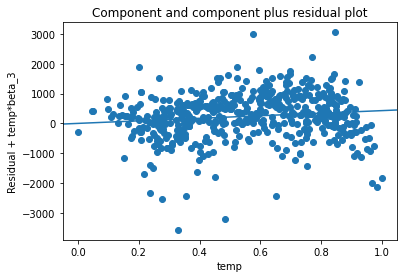

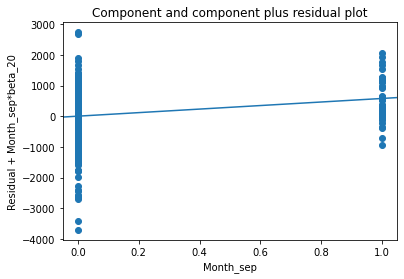

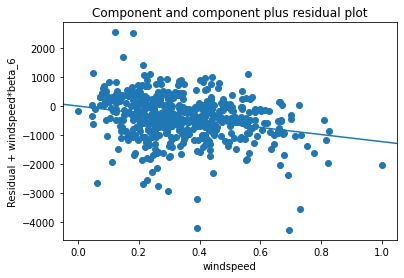

In [62]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot
lr = sm.OLS(y_train,X_train).fit()
sm.graphics.plot_ccpr(lr, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr, 'Month_sep')
plt.show()

sm.graphics.plot_ccpr(lr, 'windspeed')
plt.show()

#Homoscedasticity

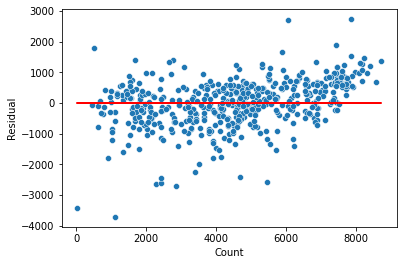

In [63]:
y_train_pred = lr.predict(X_train)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.


# Actual vs Predicted data

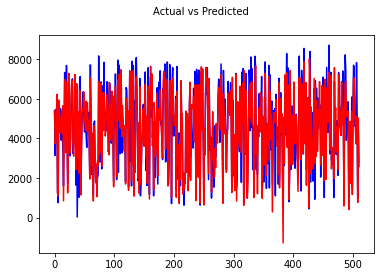

In [64]:

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 10)
plt.show()

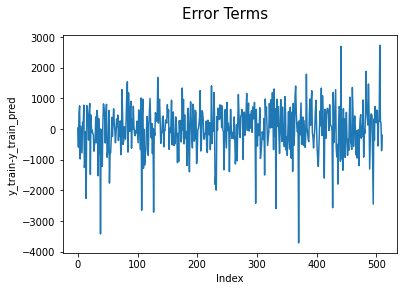

In [65]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [66]:
#R-squared Value
r2_score(y_train,y_train_pred)

0.8549382418850466

R-squared:0.833  in our final model  and 0.854 in train model


#Intrepretting the Model

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [67]:
cols = ['Year', 'season_spring',
        'season_winter', 'Month_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     287.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.01e-182
Time:                        00:02:20   Log-Likelihood:                -4168.5
No. Observations:                 511   AIC:                             8355.
Df Residuals:                     502   BIC:                             8393.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1755.5364    

#Results
Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.

1.   Company should focus on expanding business during September.
2.   Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
3.   There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact. 
4.  Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.



#Conclusion
#Significant variables to predict the demand for shared bikes

1. holiday
2. temp
3. Humidity
4. Season (winter ,spring)
5. Months(July, September)
6. Weekday Sunday
7. weathersit( Light Snow, Mist + Cloudy)